Citation: 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [7]:
import pandas as pd 

# store winequality-red.csv in data_red after reading it
data_red = pd.read_csv('data/winequality-red.csv', sep=';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
data_red.shape

(1599, 12)

Columns:
- fixed acidity: acids that are fixed/nonvolatile (do not evaporate easily)
- volatile acidity: amount of ascetic acid; high levels can lead to unpleasant, vinegar taste
- citric acid: quantity of citric acid; small quantities gives wine freshness and flavor
- residual sugar: amount of sugar remaining after fermentation stops
- chlorides: amount of salt in the wine
- free sulfur dioxide: free form of SO2 that exists between its dissolved gas form and bisulfite ion; prevents microbial growth and oxidation of wine
- total sulfur dioxide: amount of free and bound SO2; does not affect smell and taste below 50 ppm  
- density: density of the wine; dependent on the alcohol and sugar content and 
- pH: how acidic the wine is; most are between 3-4
- sulphates: wine additive; acts as an antimicrobial and antioxidant
- alcohol: percent alcohol content of the wine
- quality: quality of the range with a value that ranges from 0-10

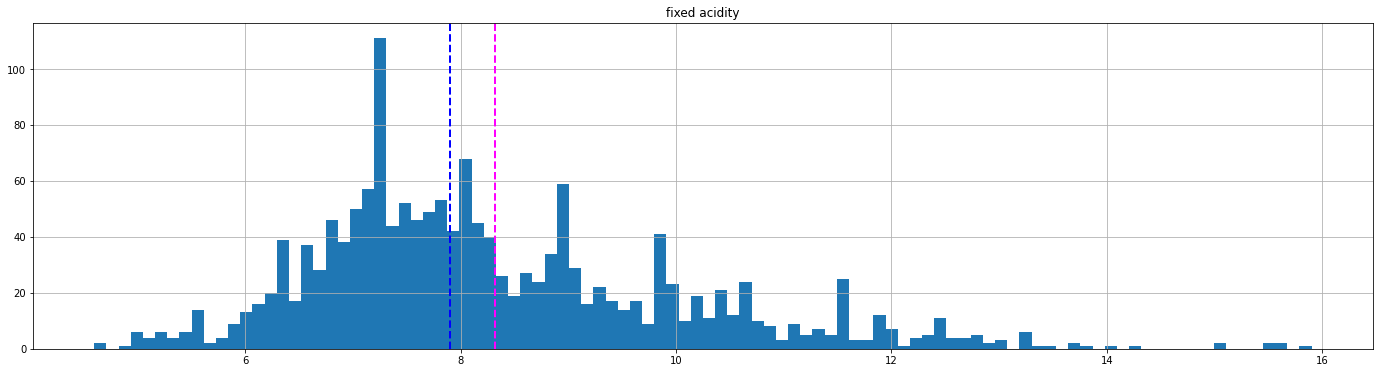

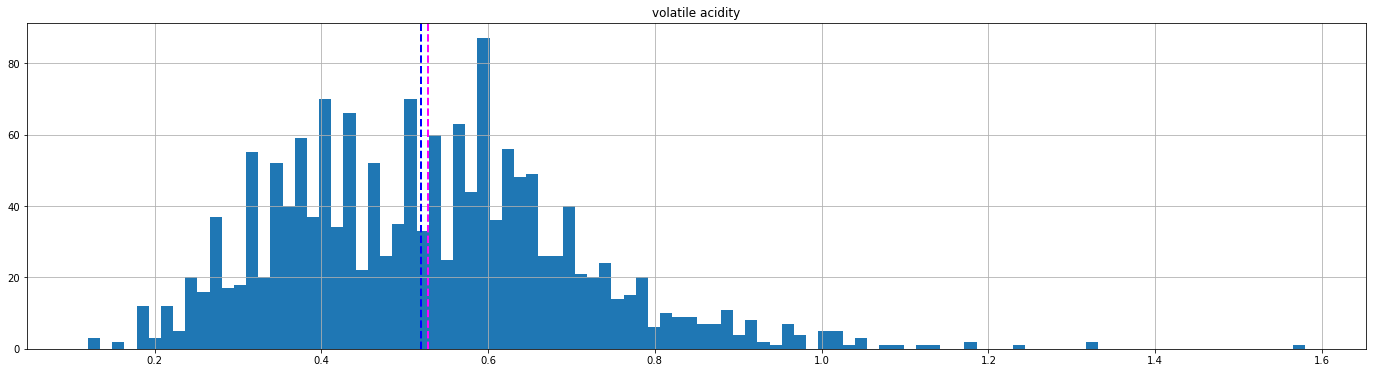

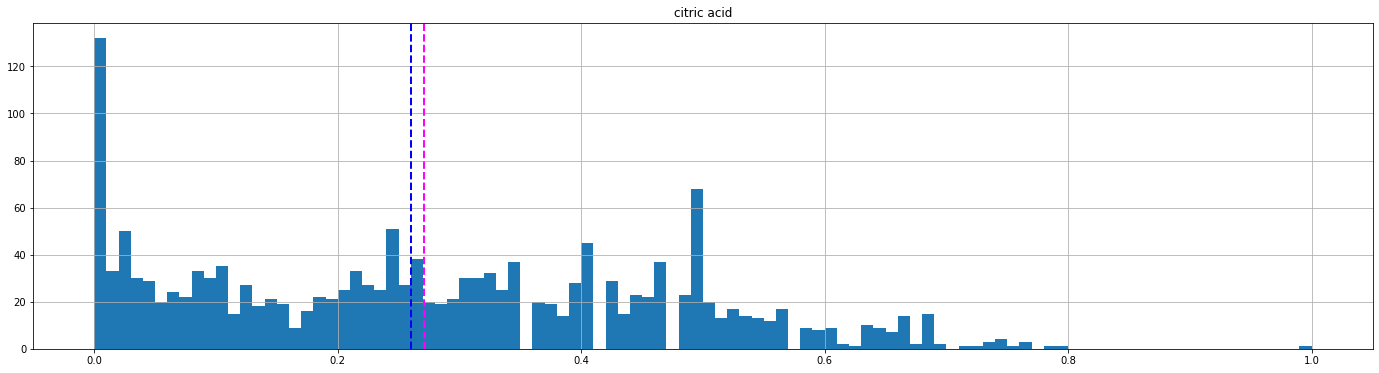

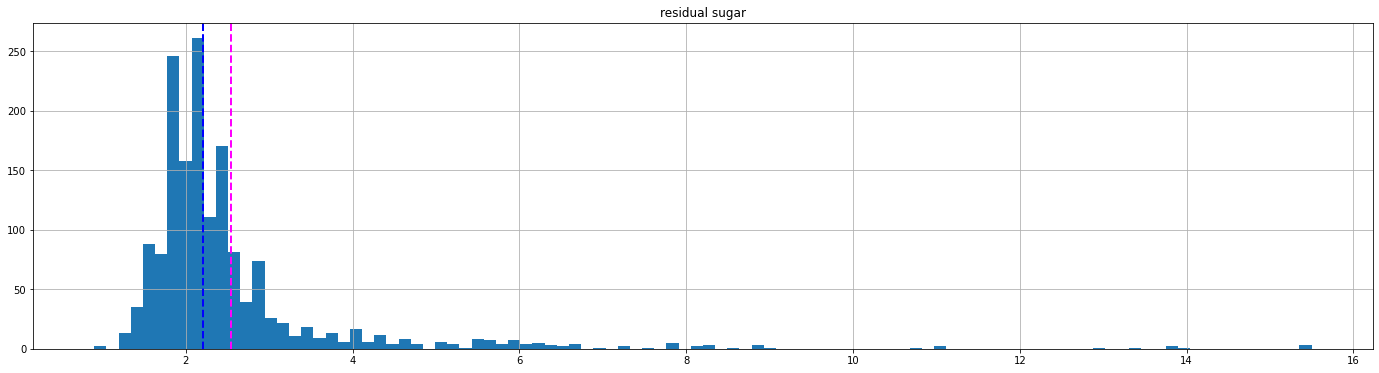

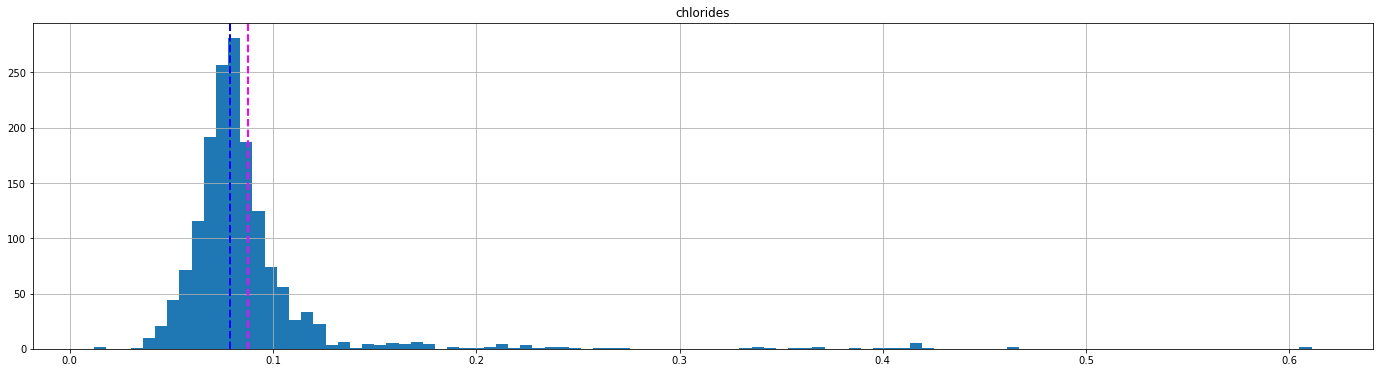

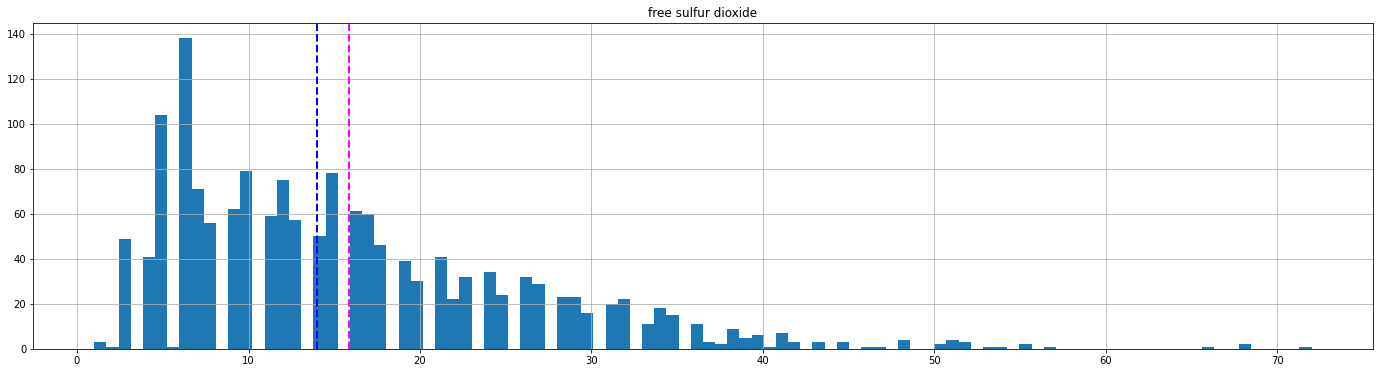

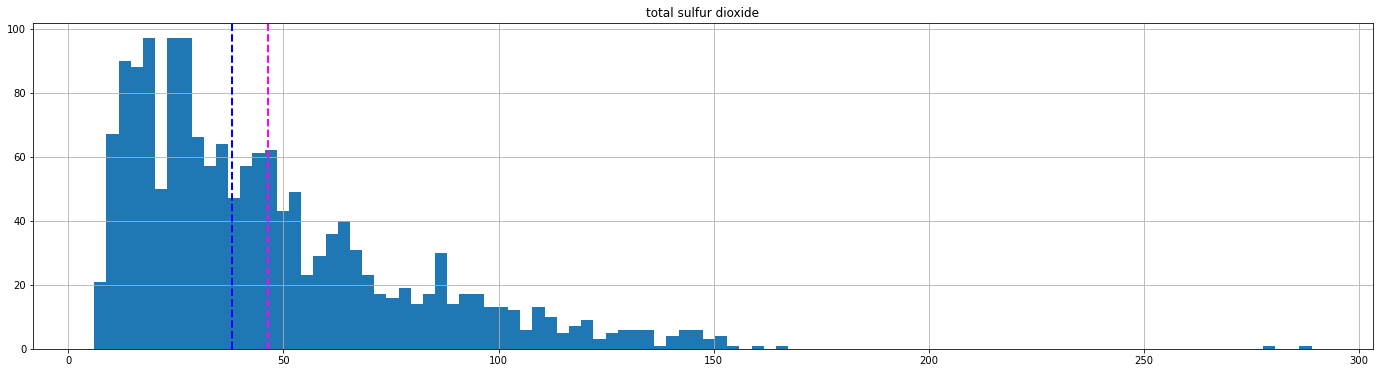

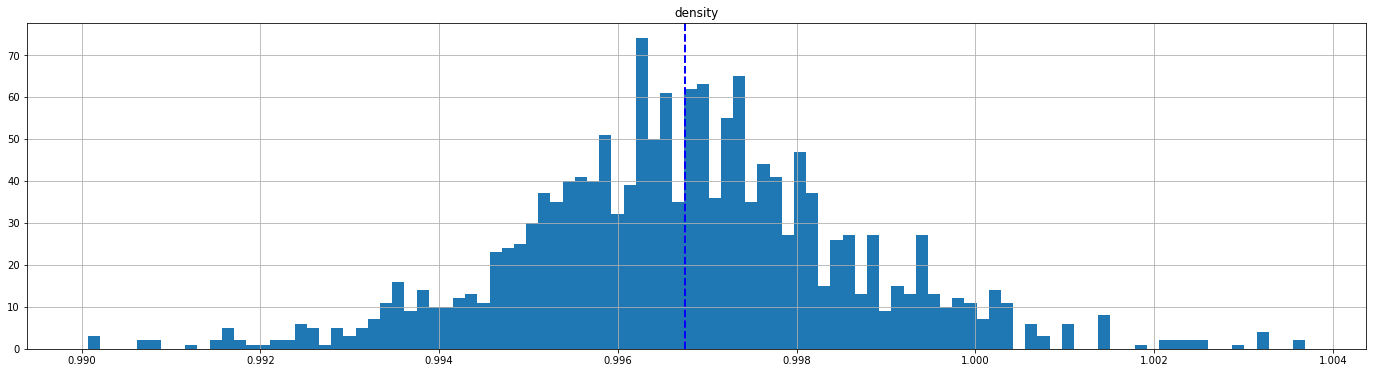

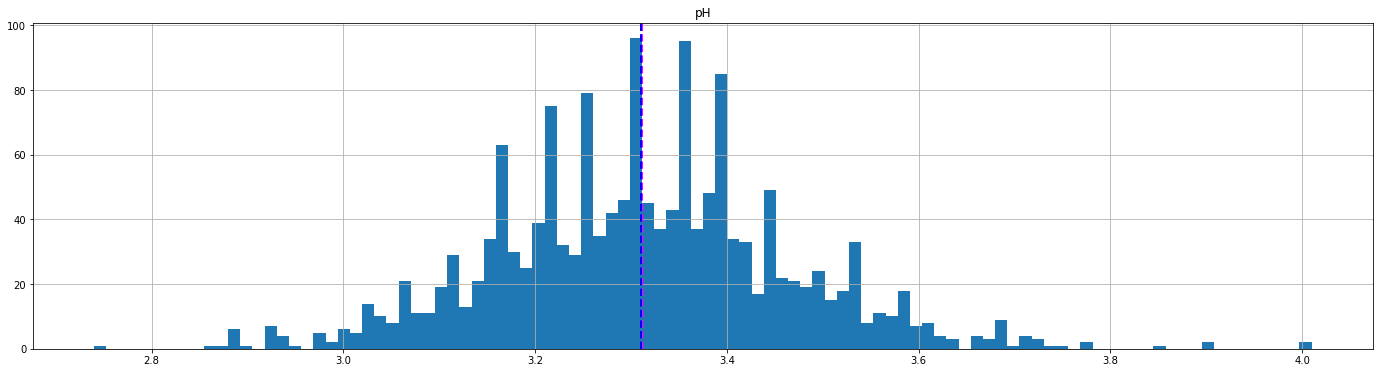

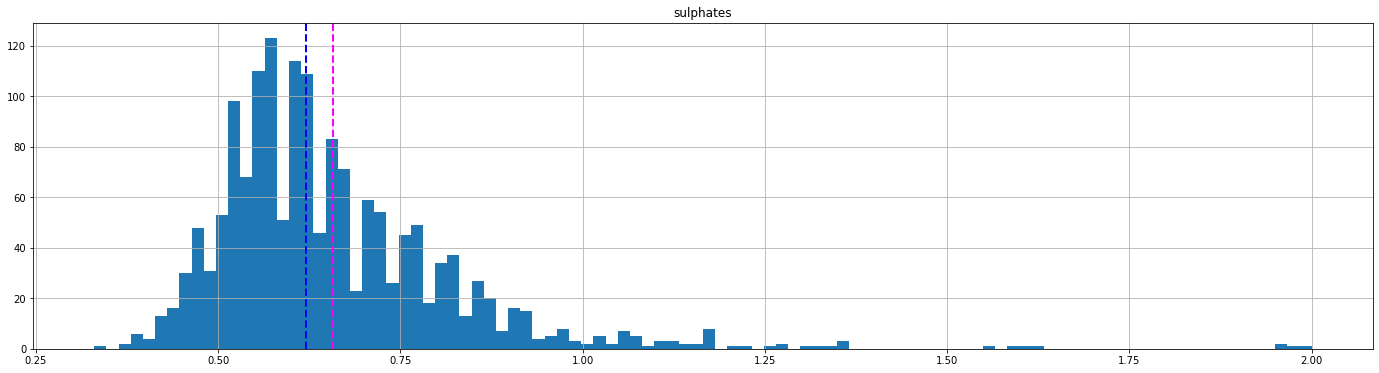

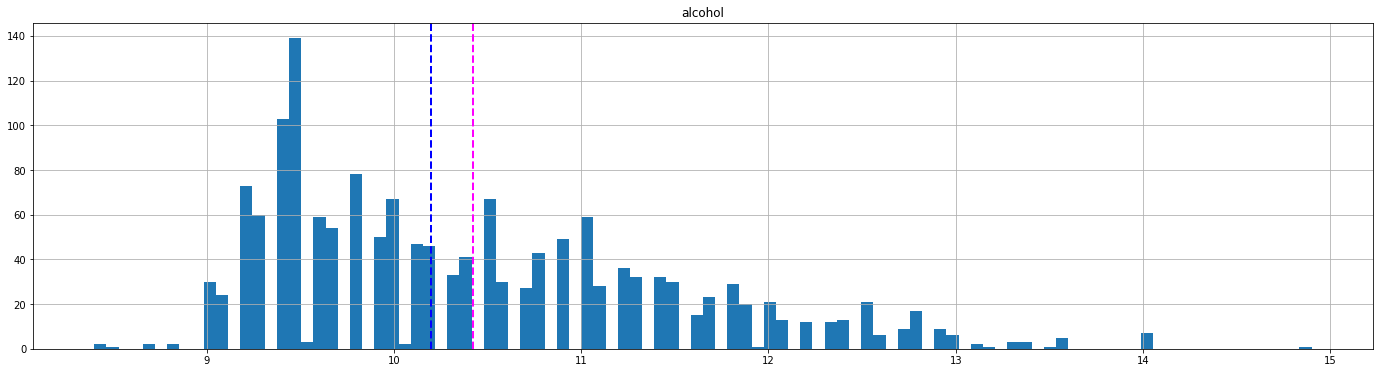

In [22]:
import matplotlib.pyplot as plt

numeric_features = data_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

for col in numeric_features:
    fig = plt.figure(figsize=(24, 6))
    ax = fig.gca()
    feature = data_red[col]

    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)

plt.show()

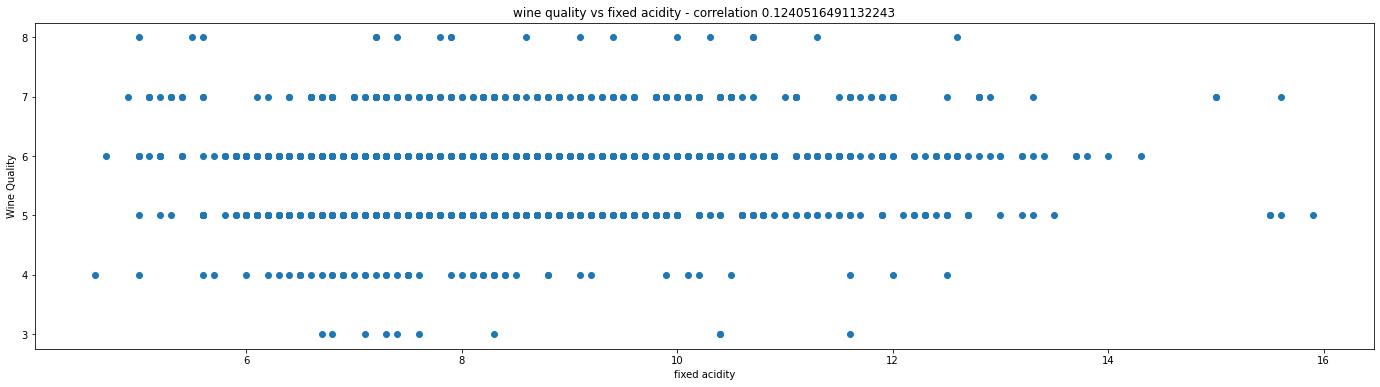

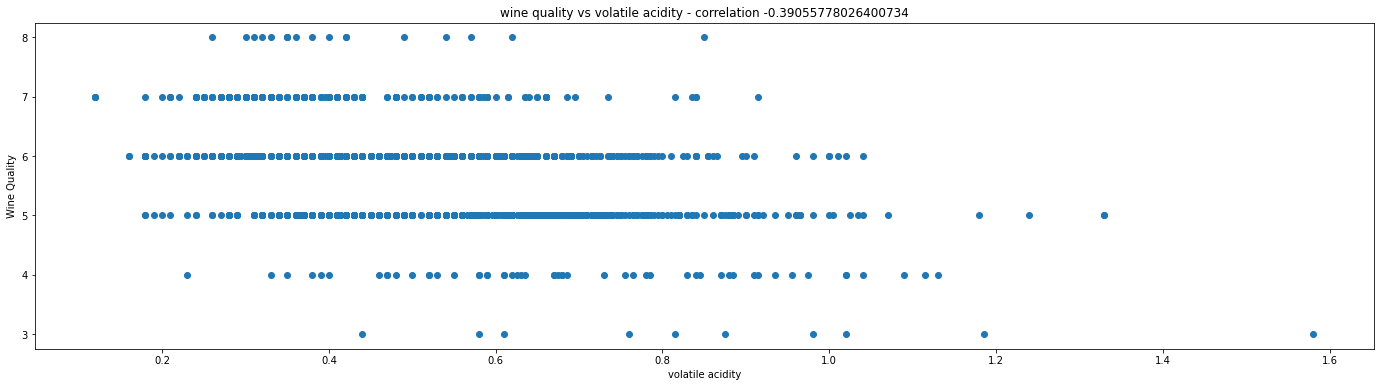

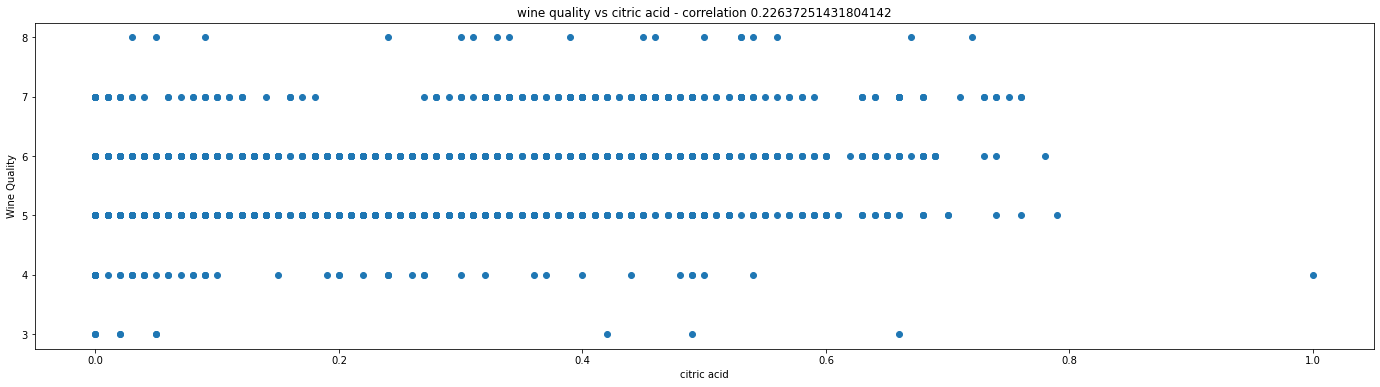

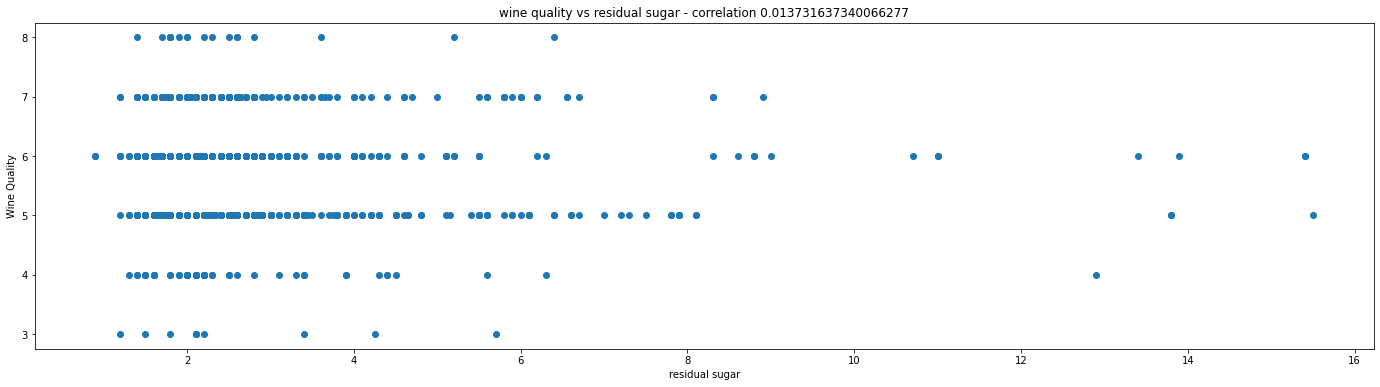

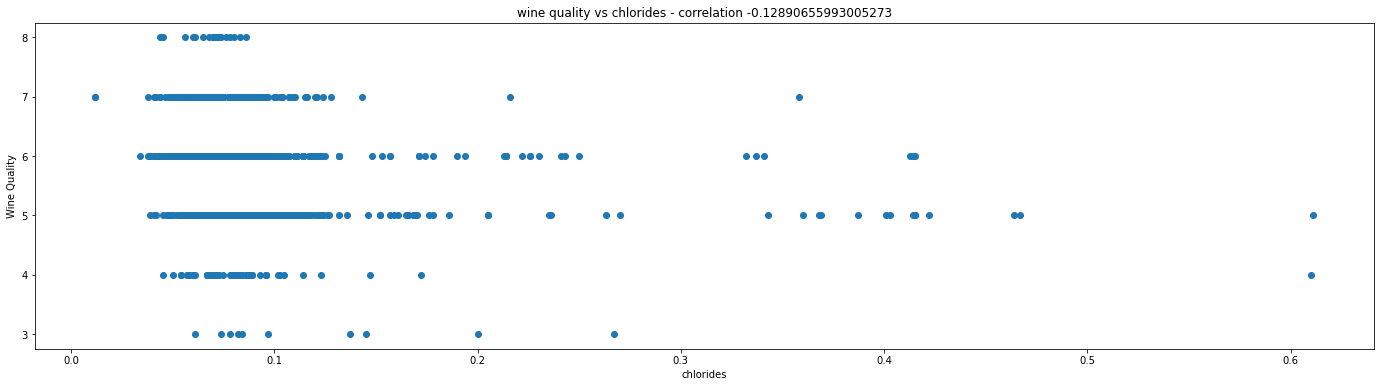

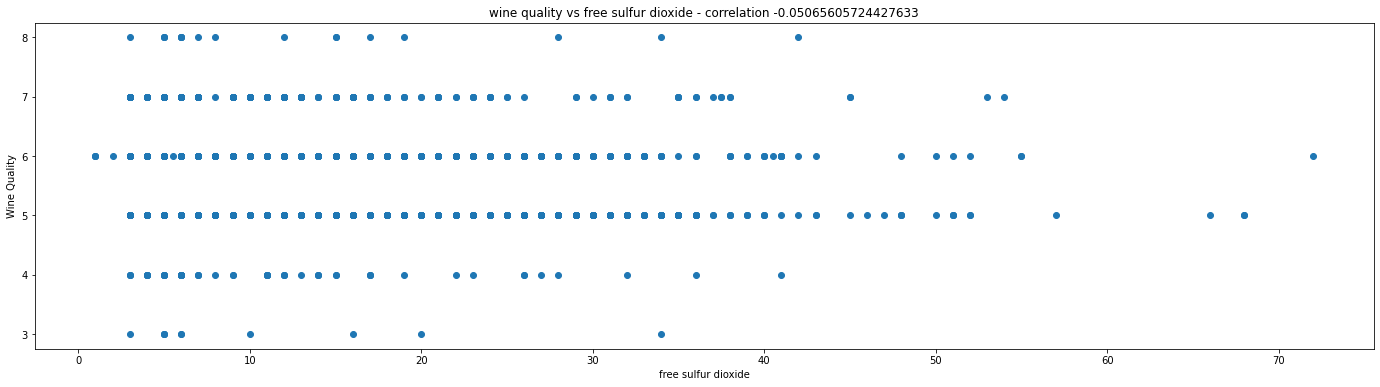

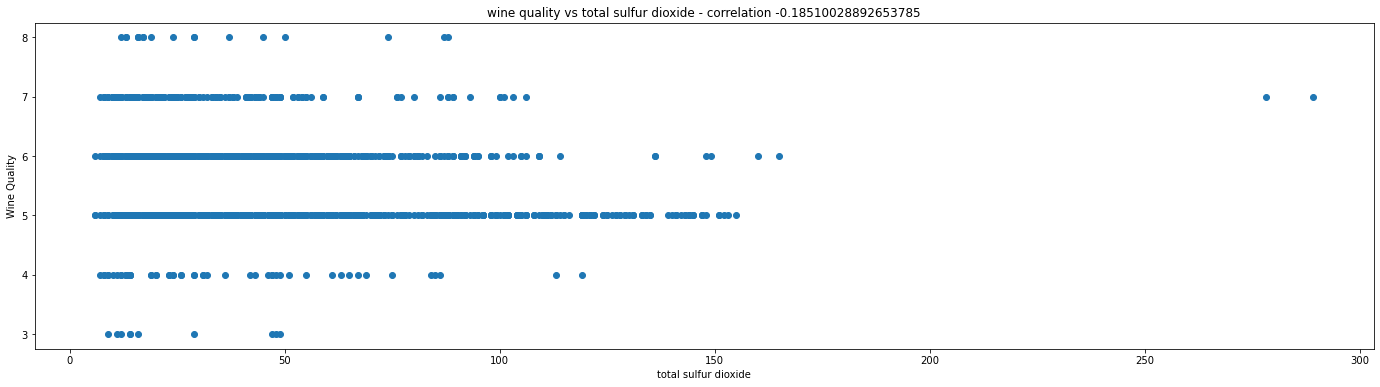

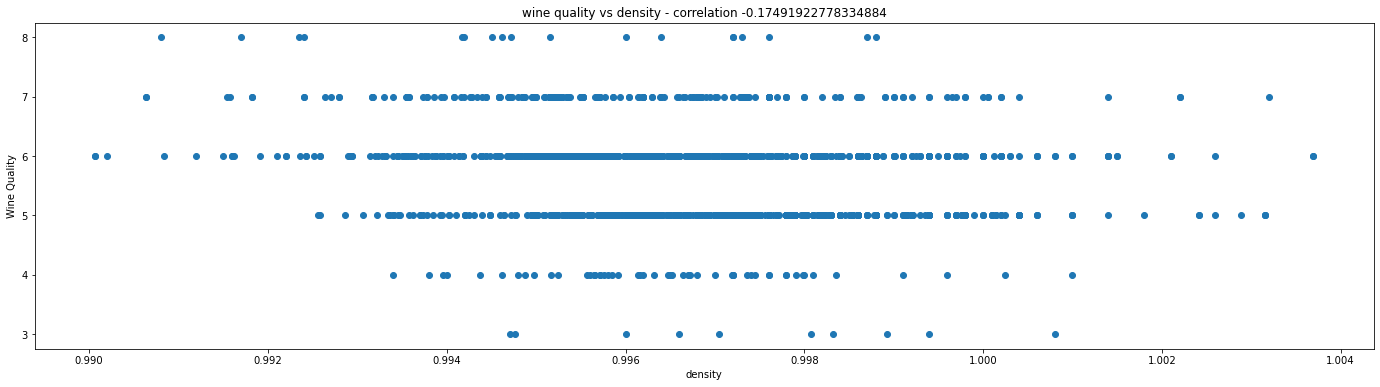

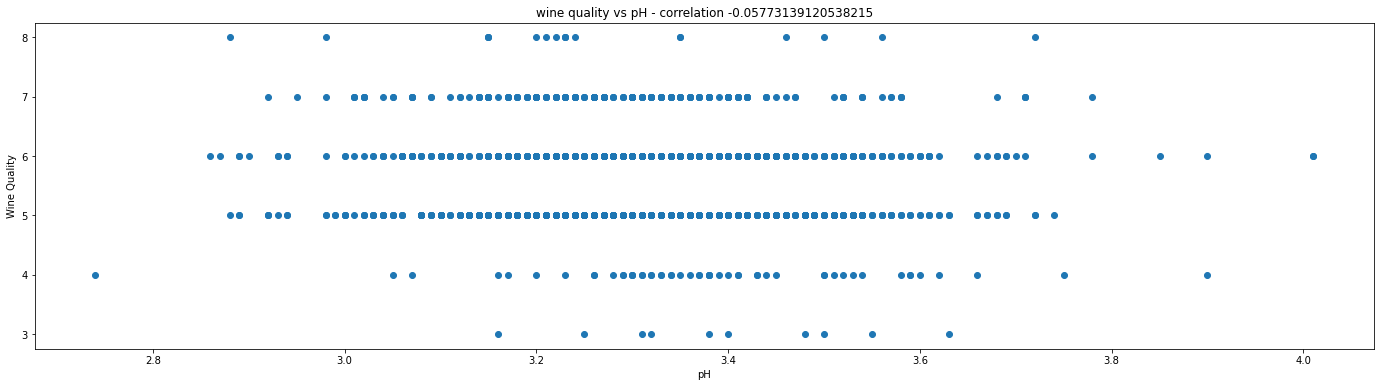

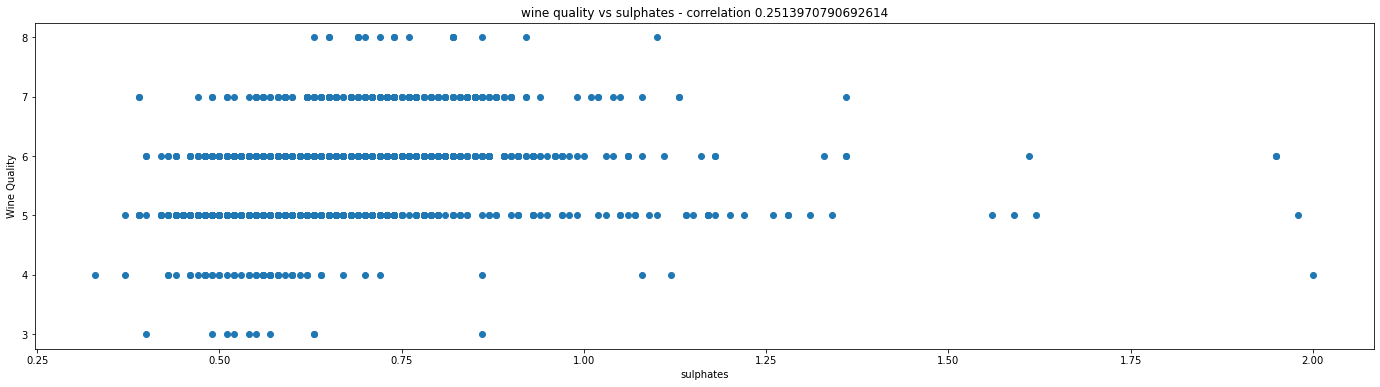

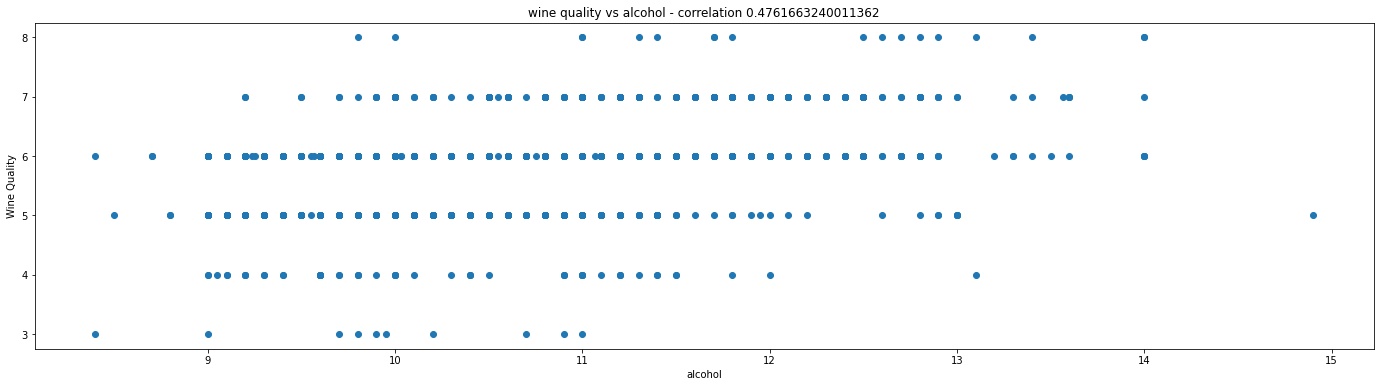

In [24]:
for col in numeric_features:
    fig = plt.figure(figsize=(24, 6))
    ax = fig.gca()
    feature = data_red[col]
    y = data_red['quality']
    correlation = feature.corr(y)
    plt.scatter(x=feature, y=y)
    plt.xlabel(col)
    plt.ylabel('Wine Quality')
    plt.title(f'wine quality vs {col} - correlation {correlation}')

In [29]:
from sklearn.model_selection import train_test_split

X, y = data_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values, data_red['quality'].values    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(f"Training Set: {X_train.shape[0]} \nTest Set: {X_test.shape[0]}")

Training set: 1119 
Test set: 480


Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression().fit(X_train, y_train)

lin_reg_prediction = np.round(lin_reg_model.predict(X_test))

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import numpy as np

lin_reg_mse = mean_squared_error(y_test, lin_reg_prediction)
print(f"MSE: {mse}")

lin_reg_rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

lin_reg_r2 = r2_score(y_test, lin_reg_prediction)
print(f"R2: {r2}")

lin_reg_expl_var = explained_variance_score(y_test, lin_reg_prediction)
print(f"Explained Variance Score: {lin_reg_expl_var}")

MSE: 0.4007803663750094
RMSE: 0.6330721652189499
R2: 0.3207112434321874
Explained Variance Score: 0.22422316384180785


In [83]:
lin_reg_results = {'MSE': lin_reg_mse, 'RMSE': lin_reg_rmse, 'R2': lin_reg_r2, 'Explained Variance Score': lin_reg_expl_var}
df_index = ['lin_reg']
df_lin_reg_results = pd.DataFrame(lin_reg_results, index=[df_index])

print(df_lin_reg_results)

              MSE      RMSE        R2  Explained Variance Score
lin_reg  0.458333  0.633072  0.223164                  0.224223


Lasso

In [95]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train, y_train)

lasso_prediction = np.round(lasso_model.predict(X_test))

lasso_mse = mean_squared_error(y_test, lasso_prediction)
print(f"MSE: {lasso_mse}")

lasso_rmse = np.sqrt(lasso_mse)
print(f"RMSE: {lasso_rmse}")

lasso_r2 = r2_score(y_test, lasso_prediction)
print(f"R2: {lasso_r2}")

lasso_expl_var = explained_variance_score(y_test, lasso_prediction)
print(f"Explained Variance Score: {lasso_expl_var}")

MSE: 0.7125
RMSE: 0.8440971508067067
R2: -0.2076271186440679
Explained Variance Score: -0.05508474576271172


In [96]:
lasso_results = {'MSE': lasso_mse, 'RMSE': lasso_rmse, 'R2': lasso_r2, 'Explained Variance Score': lasso_expl_var}
df_index = ['lasso']
df_lasso_results = pd.DataFrame(lasso_results, index=[df_index])

print(df_lasso_results)

          MSE      RMSE        R2  Explained Variance Score
lasso  0.7125  0.844097 -0.207627                 -0.055085


Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor().fit(X_train, y_train)

decision_tree_prediction = np.round(decision_tree_model.predict(X_test))

decision_tree_mse = mean_squared_error(y_test, decision_tree_prediction)
print(f"MSE: {decision_tree_mse}")

decision_tree_rmse = np.sqrt(decision_tree_mse)
print(f"RMSE: {decision_tree_rmse}")

decision_tree_r2 = r2_score(y_test, decision_tree_prediction)
print(f"R2: {decision_tree_r2}")

decision_tree_expl_var = explained_variance_score(y_test, decision_tree_prediction)
print(f"Explained Variance Score: {decision_tree_expl_var}")

MSE: 0.6354166666666666
RMSE: 0.7971302695712079
R2: -0.07697740112994356
Explained Variance Score: -0.07432173964218469


In [94]:
decision_tree_results = {'MSE': decision_tree_mse, 'RMSE': decision_tree_rmse, 'R2': decision_tree_r2, 'Explained Variance Score': decision_tree_expl_var}
df_index = ['decision tree']
df_decision_tree_results = pd.DataFrame(decision_tree_results, index=[df_index])

print(df_decision_tree_results)

                    MSE     RMSE        R2  Explained Variance Score
decision tree  0.635417  0.79713 -0.076977                 -0.074322


In [99]:
results_aggregate = pd.DataFrame([lin_reg_results, lasso_results, decision_tree_results], index=['linear regression', 'lasso', 'decision tree'])
print(results_aggregate)

                        MSE      RMSE        R2  Explained Variance Score
linear regression  0.458333  0.633072  0.223164                  0.224223
lasso              0.712500  0.844097 -0.207627                 -0.055085
decision tree      0.635417  0.797130 -0.076977                 -0.074322


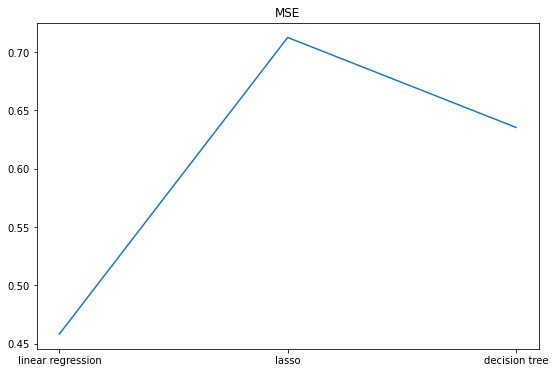

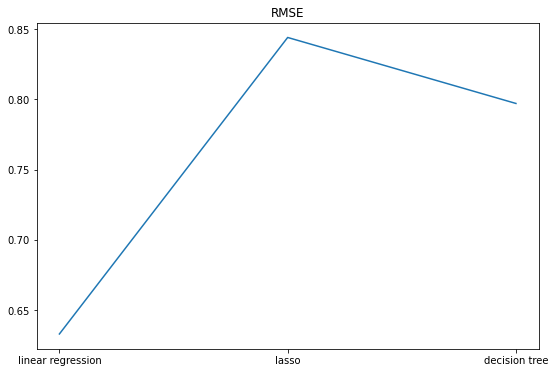

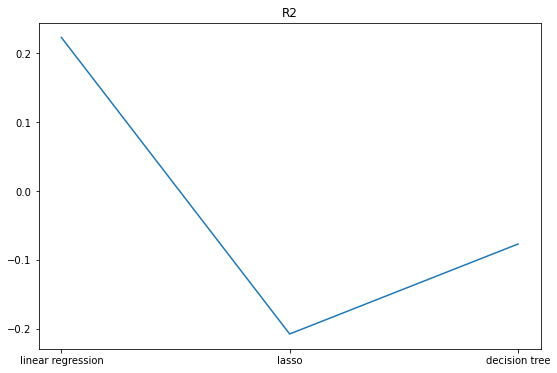

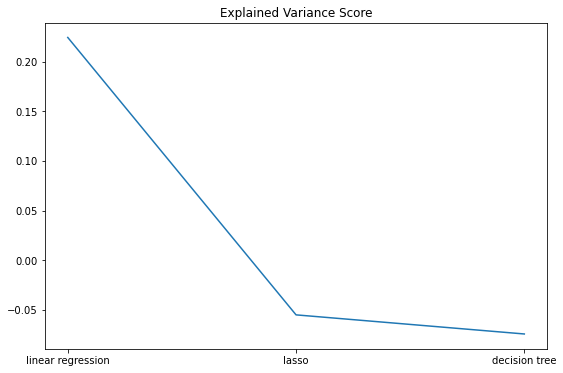

In [106]:
columns = results_aggregate.columns

for col in columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    plt.plot(results_aggregate.loc[:, col])
    plt.title(col)